# Deep Learning with PyTorch Step-by-Step: A Beginner's Guide

# Saving and Loading Models

In [1]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.utils.data.dataset import random_split
from torch.utils.tensorboard import SummaryWriter

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
from plots.chapter2 import *

## Helper Functions

In [3]:
def make_train_step(model, loss_fn, optimizer):
    # Builds function that performs a step in the train loop
    def perform_train_step(x, y):
        # Sets model to TRAIN mode
        model.train()
        
        # Step 1 - computes model's predictions - forward pass
        yhat = model(x)
        # Step 2 - computes the loss
        loss = loss_fn(yhat, y)
        # Step 3 - computes gradients for "b" and "w" parameters
        loss.backward()
        # Step 4 - updates parameters using gradients and
        # the learning rate
        optimizer.step()
        optimizer.zero_grad()
        
        # Returns the loss
        return loss.item()
    
    # Returns the function that will be called inside the 
    # train loop
    return perform_train_step

In [4]:
def mini_batch(device, data_loader, step):
    mini_batch_losses = []
    for x_batch, y_batch in data_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        mini_batch_loss = step(x_batch, y_batch)
        mini_batch_losses.append(mini_batch_loss)

    loss = np.mean(mini_batch_losses)
    return loss

In [5]:
def make_val_step(model, loss_fn):
    # Builds function that performs a step 
    # in the validation loop
    def perform_val_step(x, y):
        # Sets model to EVAL mode
        model.eval()     
        
        # Step 1 - Computes our model's predicted output
        # forward pass
        yhat = model(x)
        # Step 2 - Computes the loss
        loss = loss_fn(yhat, y)
        # There is no need to compute Steps 3 and 4, 
        # since we don't update parameters during evaluation
        return loss.item()
    
    return perform_val_step

## Data Generation

In [6]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

### Generating training and validation sets

In [7]:
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]
# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

## Full Pipeline

In [8]:
%run -i data_preparation/v2.py
%run -i model_configuration/v3.py
%run -i model_training/v5.py

## Saving Model

In [9]:
checkpoint = {'epoch': n_epochs,
              'model_state_dict': model.state_dict(),
              'optimizer_state_dict': optimizer.state_dict(),
              'loss': losses,
              'val_loss': val_losses}

torch.save(checkpoint, 'model_checkpoint.pth')

In [10]:
## After running this, the model.checkpoint.pth file will show up, meaning the model has been saved
!find . -type f -name model_checkpoint.pth

./model_checkpoint.pth


In [11]:
# Added by KA
!ls -l

total 2172
-rwxr-xr-x 1 kaushik kaushik    5895 Feb 26 21:55 Autograd.ipynb
-rwxr-xr-x 1 kaushik kaushik   12171 Feb 22 13:02 Challenges01_question.ipynb
-rwxr-xr-x 1 kaushik kaushik    6121 Mar  3 16:44 Challenges02.ipynb
-rwxr-xr-x 1 kaushik kaushik    6100 Mar  5 19:55 Challenges02_question.ipynb
-rwxr-xr-x 1 kaushik kaushik 1760231 Feb 21 14:27 Chapter02.ipynb
-rwxr-xr-x 1 kaushik kaushik  178228 Mar  3 12:02 Chapter03.ipynb
-rwxr-xr-x 1 kaushik kaushik   25311 Mar  1 23:36 Computation_Graph.ipynb
-rwxr-xr-x 1 kaushik kaushik    7803 Mar  6 09:47 DataLoader.ipynb
-rwxr-xr-x 1 kaushik kaushik   58283 Mar  8 13:54 Evaluation.ipynb
-rwxr-xr-x 1 kaushik kaushik    6508 Mar  6 11:14 Mini-batch.ipynb
-rwxr-xr-x 1 kaushik kaushik    7074 Mar  2 14:04 Putting_together_part1.ipynb
-rwxr-xr-x 1 kaushik kaushik    9999 Mar 10 14:06 Saving_Loading_Models.ipynb
-rw-r--r-- 1 kaushik kaushik       0 Mar  8 14:53 Tensorboard.ipynb
-rw-r--r-- 1 kaushik kaushik    6240 Mar 10 11:21 Tensorboard_graph

## Loading Model

### Going to Untrained Model Stage

In [12]:
%run -i data_preparation/v2.py
%run -i model_configuration/v3.py

In [13]:
# checking model parameters of untrained model
print(model.state_dict())

OrderedDict([('0.weight', tensor([[0.7645]], device='cuda:0')), ('0.bias', tensor([0.8300], device='cuda:0'))])


### Loading the model of when training occurred

In [14]:
# Loading the trained model which we saved earlier
checkpoint = torch.load('model_checkpoint.pth')

model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

saved_epoch = checkpoint['epoch']
saved_losses = checkpoint['loss']
saved_val_losses = checkpoint['val_loss']

print(model.train()) # always use TRAIN for resuming training

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)


### Checking model parameters after loading model

In [15]:
# checking model parameters
print(model.state_dict())

OrderedDict([('0.weight', tensor([[1.9432]], device='cuda:0')), ('0.bias', tensor([1.0263], device='cuda:0'))])


## Resuming Training

In [16]:
# running model training v5 script (training for additional 200 epochs)
%run -i model_training/v5.py

In [17]:
# checking model parameters
print(model.state_dict())

OrderedDict([('0.weight', tensor([[1.9432]], device='cuda:0')), ('0.bias', tensor([1.0263], device='cuda:0'))])


## Plotting Losses

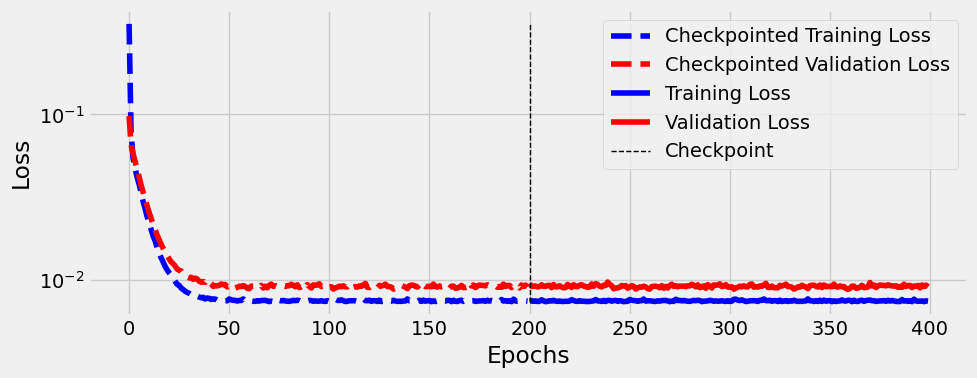

In [18]:
fig = plot_resumed_losses(saved_epoch, saved_losses, saved_val_losses, n_epochs, losses, val_losses)